In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/DietHabit.csv.csv")

In [ ]:
column_names = data.columns

In [ ]:
print(column_names)

Index(['Food_items', 'Breakfast', 'Lunch', 'Dinner', 'VegNovVeg', 'Calories',
       'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium',
       'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars'],
      dtype='object')


In [ ]:
dimensions = data.shape

In [ ]:
print(dimensions)

(89, 16)


In [ ]:
print(data.head(5))

            Food_items  Breakfast  Lunch  Dinner VegNovVeg  Calories  Fats  \
0           aloo Tikki          0      1       1                  22   0.2   
1                Kadhi          1      0       0         0       160  15.0   
2              Bananas          1      0       0         0        89   0.3   
3  Bread made in wheat          0      1       1         0       250   1.5   
4        Mango Chutney          1      0       0         0       349   0.4   

   Proteins  Iron  Calcium  Sodium  Potassium  Carbohydrates  Fibre  VitaminD  \
0       2.4  0.91     23.0      14      224.0            4.1    2.0         0   
1       2.0  0.55     12.0       7      485.0            8.5    6.7         0   
2       1.1  0.26      5.0       1      358.0           23.0    2.6         0   
3      10.0  2.76     20.0     439      165.0           49.0    4.1         0   
4      14.0  6.80    190.0     298       77.0           77.0   13.0         0   

   Sugars  
0     1.3  
1     0.7  
2    12.

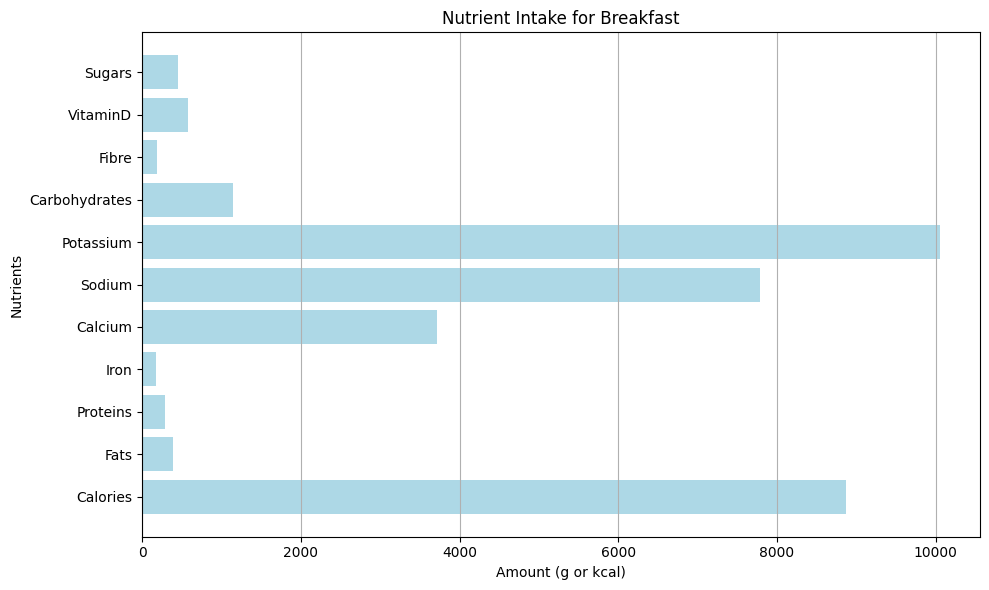

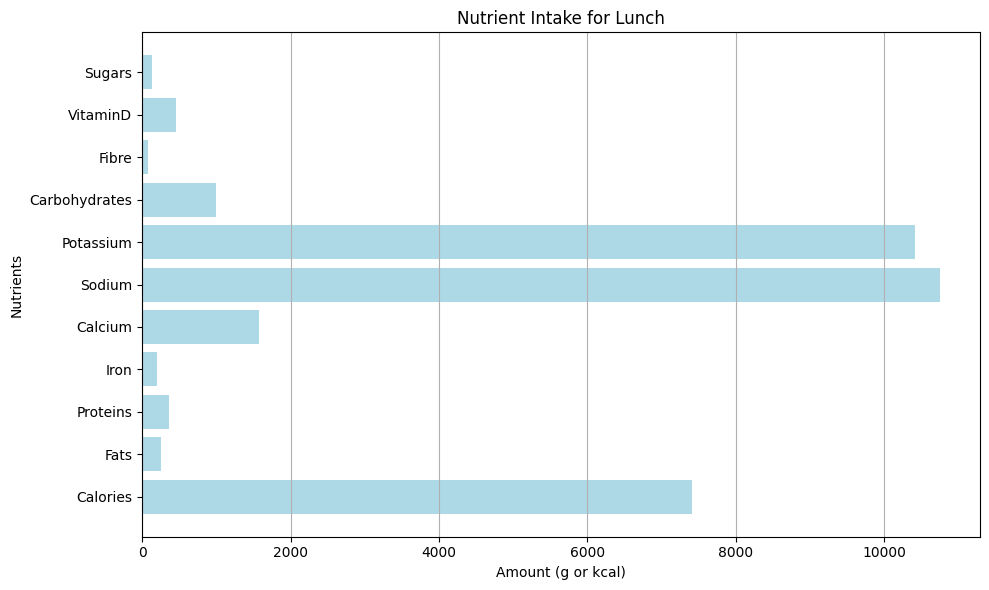

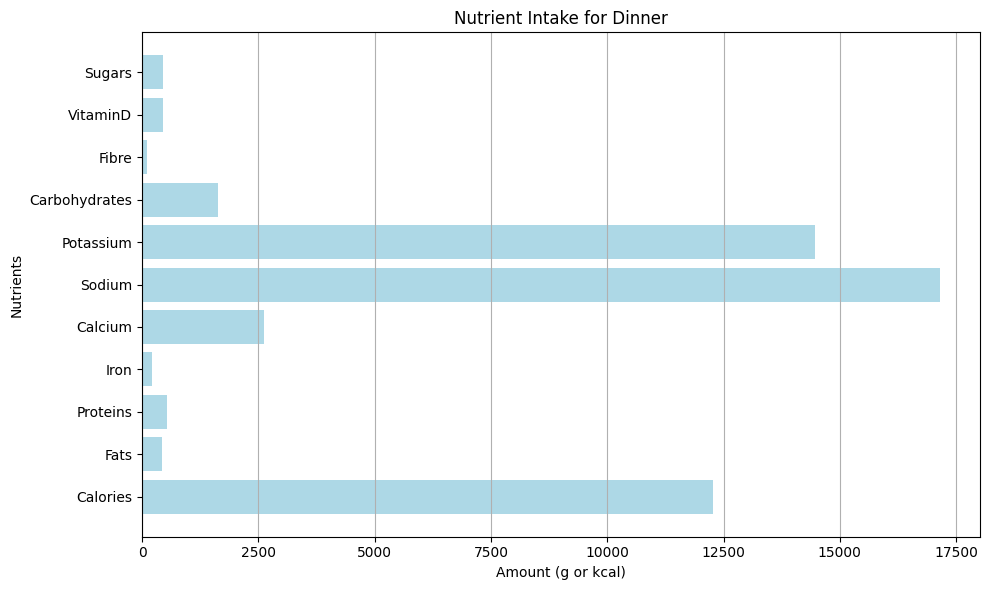

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt





df = pd.DataFrame(data)

# Calculate nutrients intake for Breakfast, Lunch, and Dinner
nutrients = ['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']

# Function to calculate the sum of nutrients for each meal type
def calculate_meal_nutrients(df, meal):
    return df[df[meal] == 1][nutrients].sum()

# Calculate nutrients for each meal
breakfast_nutrients = calculate_meal_nutrients(df, 'Breakfast')
lunch_nutrients = calculate_meal_nutrients(df, 'Lunch')
dinner_nutrients = calculate_meal_nutrients(df, 'Dinner')

# Create a list of nutrient sums for each meal
meal_nutrients = {
    'Breakfast': breakfast_nutrients,
    'Lunch': lunch_nutrients,
    'Dinner': dinner_nutrients
}

# Plot each meal's nutrient intake
for meal, nutrients in meal_nutrients.items():
    plt.figure(figsize=(10, 6))
    plt.barh(nutrients.index, nutrients.values, color='lightblue')
    plt.title(f'Nutrient Intake for {meal}')
    plt.xlabel('Amount (g or kcal)')
    plt.ylabel('Nutrients')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

In [ ]:
# Assuming 'df' is your dataset
# Import OneHotEncoder for converting categorical variables to numerical
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding for the 'Food_items' column
df_encoded = pd.get_dummies(df, columns=['Food_items'])

# If there are other string-based categorical columns like 'VegNovVeg', label encode them
df['VegNovVeg'] = LabelEncoder().fit_transform(df['VegNovVeg'])

# Features and target selection
X = df_encoded.drop(columns=['Calories'])  # Features
y = df_encoded['Calories']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance (to understand which features are most impactful)
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

Mean Squared Error: 2771.070105555555
R-squared: 0.9087141054980576
                            Importance
Fats                          0.507805
Carbohydrates                 0.357820
Sodium                        0.026211
Fibre                         0.020510
Proteins                      0.016888
...                                ...
Food_items_Rohu Curry         0.000000
Food_items_Red Sauce Pasta    0.000000
Food_items_Masala Aloo        0.000000
Food_items_Cornflakes         0.000000
Food_items_Corn               0.000000

[103 rows x 1 columns]


<ipython-input-17-e530f0cbc5af>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette="viridis")


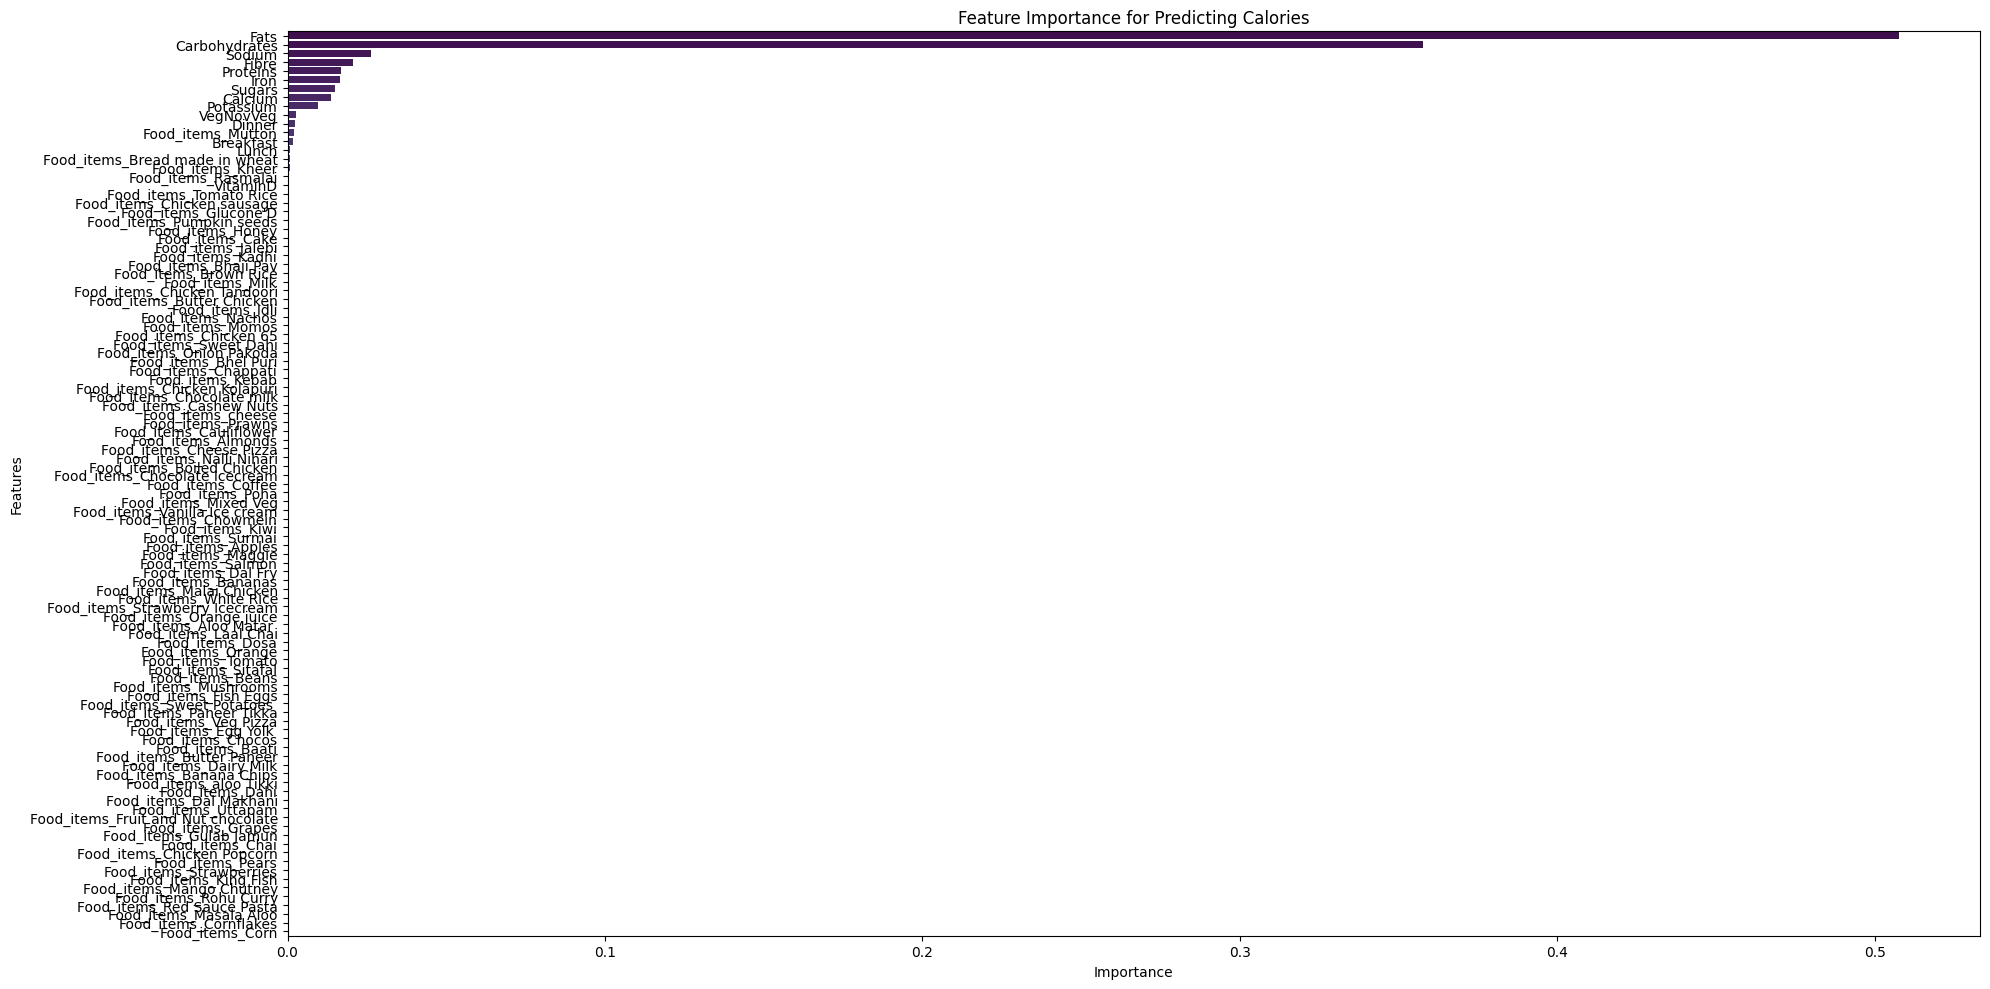

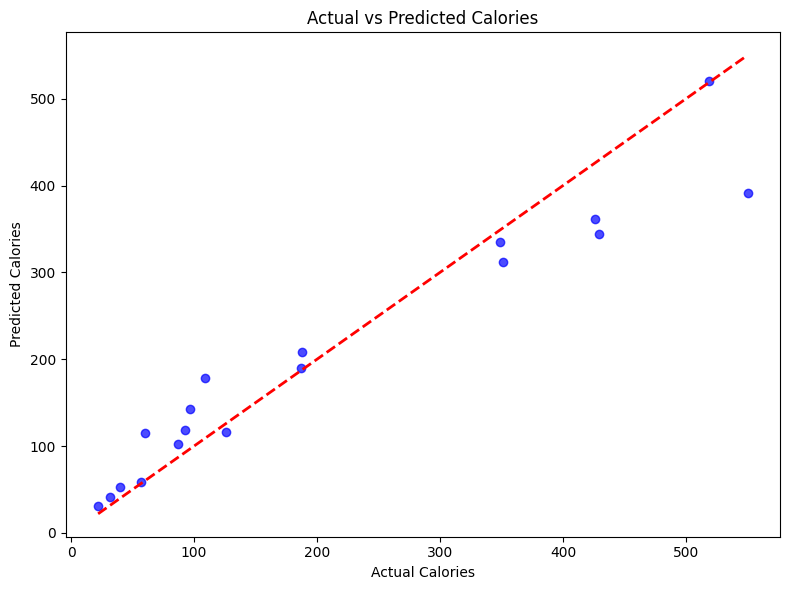

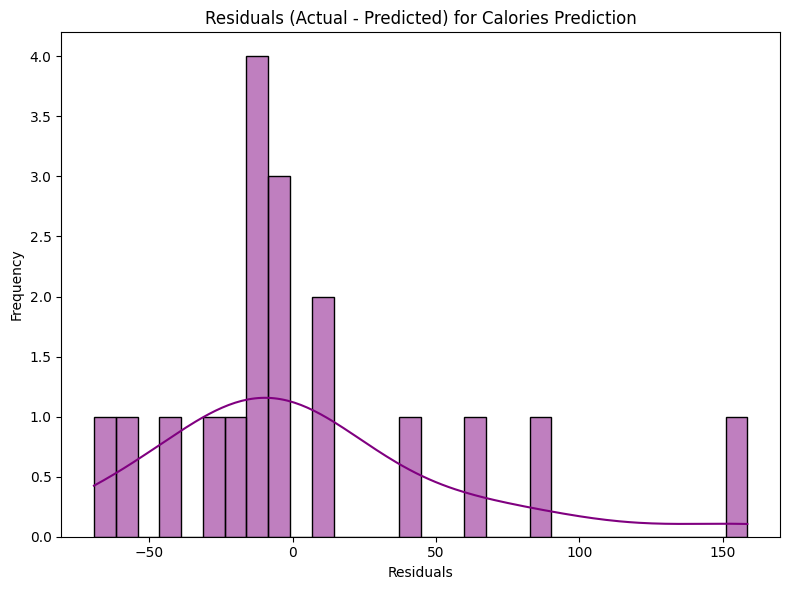

<ipython-input-17-e530f0cbc5af>:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual Calories', shade=True, color='green')
<ipython-input-17-e530f0cbc5af>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted Calories', shade=True, color='orange')


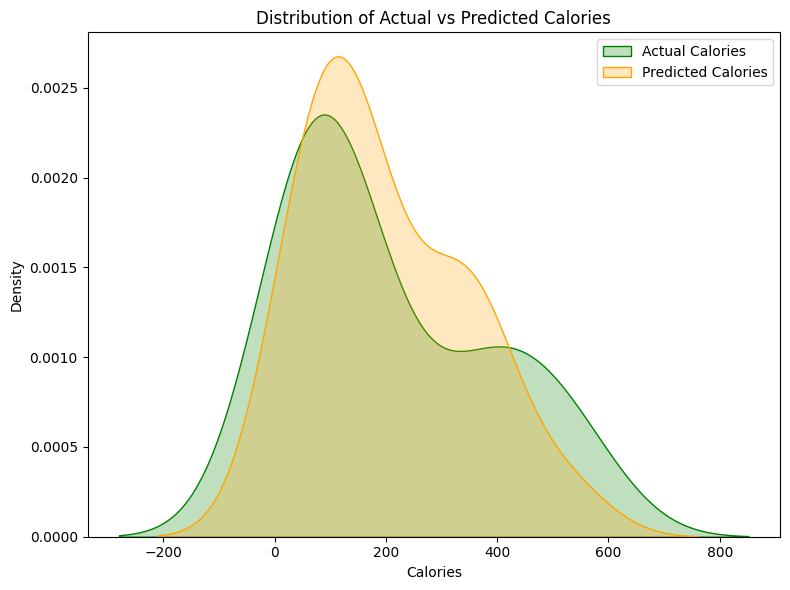

In [ ]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature Importance Visualization
plt.figure(figsize=(20, 10))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette="viridis")
plt.title('Feature Importance for Predicting Calories')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# 2. Actual vs Predicted Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect predictions
plt.title('Actual vs Predicted Calories')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.tight_layout()
plt.show()

# 3. Residual Plot (Errors between actual and predicted values)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Residuals (Actual - Predicted) for Calories Prediction')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Distribution of Actual vs Predicted Calories
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual Calories', shade=True, color='green')
sns.kdeplot(y_pred, label='Predicted Calories', shade=True, color='orange')
plt.title('Distribution of Actual vs Predicted Calories')
plt.xlabel('Calories')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()